In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import time

In [137]:
# Python code to create the dataset
with open("pattern_data.txt", "w") as f:
    for _ in range(100000):  # Adjust number of repetitions as needed
        f.write("1,2,3,4,5,")

In [2]:
# hyperparameters
batch_size = 8 # how many independent sequences will we process in parallel?
input_size = 128 # what is the maximum context length for predictions?
max_iters = 20000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
eval_iters = 200
n_embedding = 384
n_head = 24
n_layer = 12
dropout = 0.2
# ------------

cuda


In [139]:

# 7 habits of highly effective people
with open('pattern_data.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    #print(text)
print(len(text))


1000000


In [3]:
# code
with open('code.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    #print(text)
print(len(text))

1122164


In [16]:
# here are all the unique characters that occur in this text
print(set(text))
print(list(set(text)))
print(sorted(list(set(text))))
print(len(sorted(list(set(text)))))
chars = sorted(list(set(text)))
vocab_size = len(chars)

# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

#print(stoi[1])
print(encode(['1','2','3']))
print(decode(encode(['1','2','3'])))

{'Y', 'R', ':', ',', '%', '”', '⋅', 'I', 'V', 'b', 'k', 'x', 'o', 'S', '@', '=', 'B', 'K', 'H', 'F', '*', '|', '0', '.', '9', 'D', 'E', 'j', 'w', "'", 'c', '7', 'N', '-', 'O', '4', ' ', '“', 'Q', 'z', '‘', 'M', '2', '_', ';', 'i', 'p', 'W', '{', 'u', '<', '"', '}', '\\', '~', 'C', '6', '(', 'e', 'a', 'G', 'd', '5', 'T', '[', '\t', '+', 't', 'U', 'r', ']', '?', '>', 'P', '−', 'Z', 'n', 'X', '«', 'J', 'm', 'y', '\n', '3', '»', 's', 'A', '’', 'v', '$', 'f', 'q', '≥', '#', '`', 'g', '1', 'h', '!', '&', '^', '/', 'L', '8', ')', 'l'}
['Y', 'R', ':', ',', '%', '”', '⋅', 'I', 'V', 'b', 'k', 'x', 'o', 'S', '@', '=', 'B', 'K', 'H', 'F', '*', '|', '0', '.', '9', 'D', 'E', 'j', 'w', "'", 'c', '7', 'N', '-', 'O', '4', ' ', '“', 'Q', 'z', '‘', 'M', '2', '_', ';', 'i', 'p', 'W', '{', 'u', '<', '"', '}', '\\', '~', 'C', '6', '(', 'e', 'a', 'G', 'd', '5', 'T', '[', '\t', '+', 't', 'U', 'r', ']', '?', '>', 'P', '−', 'Z', 'n', 'X', '«', 'J', 'm', 'y', '\n', '3', '»', 's', 'A', '’', 'v', '$', 'f', 'q', '≥

In [17]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

print(train_data[0:100])
print(text[0:100])
print(sorted(list(set(text))))


#input_size = 8
print(train_data[0:input_size+1])
print(text[0:input_size+1])


x = train_data[0:input_size]
y = train_data[1:input_size+1]

for t in range(input_size):
  context = x[0:t+1]
  target = y[t]

tensor([ 5,  2, 89, 84, 75, 86, 71,  2, 67,  2, 82, 91, 86, 74, 81, 80,  2, 82,
        84, 81, 73, 84, 67, 79,  2, 86, 81,  2, 67, 70, 70,  2, 86, 89, 81,  2,
        80, 87, 79, 68, 71, 84, 85,  2,  1, 80, 87, 79, 19,  2, 31,  2, 19, 16,
        23,  1, 80, 87, 79, 20,  2, 31,  2, 24, 16, 21,  1, 85, 87, 79,  2, 31,
         2, 80, 87, 79, 19,  2, 13,  2, 80, 87, 79, 20,  1, 82, 84, 75, 80, 86,
        10, 72,  9, 53, 87, 79, 28,  2, 93, 85])
# write a python program to add two numbers 
num1 = 1.5
num2 = 6.3
sum = num1 + num2
print(f'Sum: {s
['\t', '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', '

In [18]:
# data loading
#torch.manual_seed(1337)
#batch_size = 4
#input_size = 8

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - input_size, (batch_size,))
    x = torch.stack([data[i:i+input_size] for i in ix])
    y = torch.stack([data[i+1:i+input_size+1] for i in ix])
    
    #print(f"x shape: {x.shape}, y shape: {y.shape}")
    #print(f"x dtype: {x.dtype}, y dtype: {y.dtype}")
    
    x, y = x.to(device), y.to(device)
    return x, y


@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss,ttention_scores = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

xb, yb = get_batch('train')
print("input:")
print(xb.shape)
print(xb)
print("target:")
print(yb.shape)
print(yb)

for b in range(batch_size):
  for t in range(input_size):
    context = xb[ b, 0:t+1 ]
    target = yb[ b, t ]
    #print(context,"->",target)
    
    

input:
torch.Size([8, 128])
tensor([[ 2, 75, 80,  ..., 81, 84, 70],
        [12,  4, 14,  ...,  1,  2,  2],
        [85, 82, 78,  ..., 84, 81, 73],
        ...,
        [71, 91, 85,  ..., 71, 85,  2],
        [69, 87, 84,  ..., 75, 79, 71],
        [ 2, 22, 14,  ..., 85, 86, 84]], device='cuda:0')
target:
torch.Size([8, 128])
tensor([[75, 80,  2,  ..., 84, 70, 16],
        [ 4, 14,  2,  ...,  2,  2,  2],
        [82, 78, 75,  ..., 81, 73, 84],
        ...,
        [91, 85, 19,  ..., 85,  2, 87],
        [87, 84, 84,  ..., 79, 71, 10],
        [22, 14,  2,  ..., 86, 84, 75]], device='cuda:0')


In [19]:

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key  = nn.Linear(n_embedding, head_size, bias=False)
        self.query = nn.Linear(n_embedding, head_size, bias=False)
        self.value = nn.Linear(n_embedding, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(input_size, input_size)))

        self.dropout = nn.Dropout(dropout)


    def forward(self, x, return_qkv=False):
        B,T,C = x.shape
        #print("====x=====")
        #print(x.shape)
        #x = self.gate(x)

        k = self.key(x)   # (B,T,C)
        #print(k.shape)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        attention_part = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        attention_part = attention_part.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        attention_part = F.softmax(attention_part, dim=-1) # (B, T, T)
        attention_part = self.dropout(attention_part)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = attention_part @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        
        # Compute attention scores
        attention_scores = q @ k.transpose(-2, -1) * C**-0.5  # (B, T, T)
        
        if return_qkv:
            return out, q, k, v, attention_scores
        else:
            return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.linear = nn.Linear(n_embedding, n_embedding)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.linear(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embedding):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embedding, 4 * n_embedding),
            nn.ReLU(),
            nn.Linear(4 * n_embedding, n_embedding),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embedding, n_head):
        # n_embedding: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embedding // n_head
        self.multi_head_attention = MultiHeadAttention(n_head, head_size)
        self.feed_forward = FeedFoward(n_embedding)
        self.layer_norm_1 = nn.LayerNorm(n_embedding)
        self.layer_norm_2 = nn.LayerNorm(n_embedding)

    def forward(self, x):
        x = x + self.multi_head_attention(self.layer_norm_1(x))
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x

# super simple bigram model
class GPT2(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_into_embedding = nn.Embedding(vocab_size, n_embedding)
        self.position_embedding_table = nn.Embedding(input_size, n_embedding)
        
        #Input: (∗), IntTensor or LongTensor of arbitrary shape containing the indices to extract
        #Output: (∗,H), where * is the input shape and H=embedding_dim
        
        
        self.blocks = nn.Sequential(*[Block(n_embedding, n_head=n_head) for _ in range(n_layer)])
        self.layer_norm = nn.LayerNorm(n_embedding) # final layer norm
        #self.ffwd = FeedFoward(n_embedding)
        #self.sa_head = MultiHeadAttention(4,n_embedding//4)
        self.linear_head = nn.Linear(n_embedding, vocab_size)

    def forward(self, id_number_of_vector_x, targets=None):#target (B,T)
        #B,T =id_number_of_vector_x.shape
        #tok_embed = self.token_into_embedding(id_number_of_vector_x) #(B,T,C) (batch,Time,Channel)
        #logits = self.lm_head(tok_embed) #(B,T,vocab_size)

        B, T = id_number_of_vector_x.shape
        
        #print("===B===")
        #print(B)

        #print("===T===")
        #print(T)
        
        # id_number_of_vector_x and targets are both (B,T) tensor of integers
        #tok_emb = self.token_into_embedding(id_number_of_vector_x) # (B,T,C)
        #pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        #x = tok_emb + pos_emb # (B,T,C) + pos_emb across the batch
        #x = self.blocks(x) # (B,T,C)
        #x = self.ln_f(x) # (B,T,C)
        
        #x = self.sa_head(x) # (B,T,vocab_size)
        #logits = self.lm_head(x) # (B,T,vocab_size)

        # id_number_of_vector_x and targets are both (B,T) tensor of integers
        tok_emb = self.token_into_embedding(id_number_of_vector_x) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        #x = tok_emb + pos_emb # (B,T,C)
        #x = self.blocks(x) # (B,T,C)
        #x = self.ln_f(x) # (B,T,C)
        #x = self.sa_head(x) # (B,T,vocab_size)
        #x = self.ffwd(x)
        #logits = self.lm_head(x) # (B,T,vocab_size)

        x = tok_emb + pos_emb # (B,T,C) + pos_emb across the batch
        x = self.blocks(x) # (B,T,C)
        x = self.layer_norm(x) # (B,T,C)
        
        #print("===x===")
        #print(x.shape)
        #print("8 is   (B)  batch_size, # how many independent sequences will we process in parallel?")
        #print("128 is (T) input_size # what is the maximum context length for predictions?")
        #print("384 is (C) n_embedding")
        
        # Forward pass through blocks
        # Extract q, k, v from the first head of the first block
        x_norm = self.blocks[0].layer_norm_1(x)
        head = self.blocks[0].multi_head_attention.heads[0]
        out_head, q, k, v, attention_scores = head(x_norm, return_qkv=True)
        
        
        #x = self.sa_head(x) # (B,T,vocab_size)
        logits = self.linear_head(x) # (B,T,vocab_size)

        if targets == None:
          loss = None
        else:
          B, T, C = logits.shape # logit(p) = ln( p / ( 1 - p ) )
          logits = logits.view(B*T,C)
          targets = targets.view(B*T)
          loss = F.cross_entropy(logits,targets) # H( P, Q ) = -0.9 * log( 0.8 ) - 0.1 * log( 0.2 ) = 0.311, the lower the better matching
        return logits, loss, attention_scores

    def generate(self, id_number_of_vector_x, max_new_tokens):
        # id_number_of_vector_x is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop id_number_of_vector_x to the last input_size tokens
            id_number_of_vector_x_cut = id_number_of_vector_x[:, -input_size:]
            # get the predictions
            logits, loss, attention_scores = self(id_number_of_vector_x_cut)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            id_number_of_vector_x_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            id_number_of_vector_x = torch.cat((id_number_of_vector_x, id_number_of_vector_x_next), dim=1) # (B, T+1)
        return id_number_of_vector_x


21.411178 M parameters
torch.Size([1024, 106]) tensor(4.8578, device='cuda:0', grad_fn=<NllLossBackward0>)


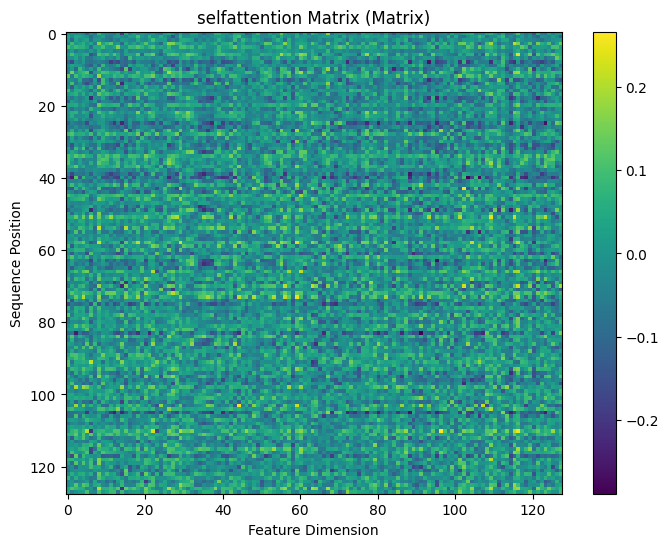

In [20]:
'''
model.load_state_dict(torch.load("./model"))
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
'''

model = GPT2()
#model.load_state_dict(torch.load("./GPT2_simple_pattern"))
#model.load_state_dict(torch.load("./GPT2_rich_dad_poor_dad"))

m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

logits, loss, attention_scores = m(xb,yb)
print(logits.shape,loss) # -ln(1/65) = 4.174387269896

import matplotlib.pyplot as plt

def visualize_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix.cpu().detach().numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Feature Dimension')
    plt.ylabel('Sequence Position')
    plt.show()

# Since q, k, v are tensors of shape (B, T, head_size), we'll visualize the first batch example
#visualize_matrix(q[0], 'Query Matrix (Q)')
#visualize_matrix(k[0], 'Key Matrix (K)')
#visualize_matrix(v[0], 'Value Matrix (V)')
visualize_matrix(attention_scores[0], 'selfattention Matrix (Matrix)')
#visualize_matrix(out_head[0], 'selfattention Matrix (Matrix)')


In [21]:

model = GPT2()
#model.load_state_dict(torch.load("./GPT2_Shakespeare"))
#model.load_state_dict(torch.load("./GPT2_rich_dad_poor_dad"))
#model.load_state_dict(torch.load("./GPT2_rich_dad_poor_dad_Fine-tuning_with_Custom_Datasets"))
#model.load_state_dict(torch.load("./GPT2_simple_pattern"))

m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

id_number_of_vector_x = torch.zeros((1,1), dtype=torch.long)
print(id_number_of_vector_x)
print(torch.tensor([[32]]).to(device))
#print(decode(m.generate(torch.zeros((1,1), dtype=torch.long, device=device), max_new_tokens=10)[0].tolist()))

#print(decode(m.generate(torch.tensor([[32]]).to(device), max_new_tokens=100)[0].tolist()))

#torch.save(m.state_dict(), "./GPT2_simple_pattern")

21.411178 M parameters
tensor([[0]])
tensor([[32]], device='cuda:0')


In [22]:
# create a PyTorch optimizer
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)



start = time.time()

for iter in range(3000):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        end = time.time()
        print(f"Elapsed time: {end - start} seconds")
        
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss, attention_scores = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    

    
print("====result_loss====")
print(loss.item())
end = time.time()
print(f"Elapsed time: {end - start} seconds")


#torch.save(m.state_dict(), "./GPT2_Shakespeare")
#torch.save(m.state_dict(), "./GPT2_7_habits")
#torch.save(m.state_dict(), "./GPT2_rich_dad_poor_dad_Fine-tuning_with_Custom_Datasets")
torch.save(m.state_dict(), "./GPT2_simple_pattern")
print(decode(m.generate(torch.zeros((1,1), dtype=torch.long,device=device), max_new_tokens=100)[0].tolist()))


21.411178 M parameters
step 0: train loss 4.8384, val loss 4.8232
Elapsed time: 22.9096896648407 seconds
step 500: train loss 2.0870, val loss 2.2551
Elapsed time: 191.7826681137085 seconds
step 1000: train loss 1.5995, val loss 1.7694
Elapsed time: 360.2303743362427 seconds
step 1500: train loss 1.3792, val loss 1.5286
Elapsed time: 528.6422998905182 seconds
step 2000: train loss 1.2012, val loss 1.3871
Elapsed time: 697.2723009586334 seconds
step 2500: train loss 1.1151, val loss 1.3194
Elapsed time: 865.555615901947 seconds
====result_loss====
1.0801689624786377
Elapsed time: 1012.2405591011047 seconds
	_num(nums):
    if num > sum(nums):
       x = x + a + random
    in > lst(nums)
    a=1
    a = 5;



In [ ]:
# not working because of the small size of the LLM
text = "13332555212"
context = torch.tensor( [ encode(text) ], dtype=torch.long, device=device )
print(decode(m.generate( context, max_new_tokens=100 )[0].tolist()))

In [27]:
class SimpleGPT2(nn.Module):
    def __init__(self, vocab_size, n_embedding, input_size, dropout):
        super(SimpleGPT2, self).__init__()
        self.token_into_embedding = nn.Embedding(vocab_size, n_embedding)
        self.position_embedding_table = nn.Embedding(input_size, n_embedding)
        self.layer_norm = nn.LayerNorm(n_embedding)
        self.linear_head = nn.Linear(n_embedding, vocab_size)
    
    def forward(self, id_number_of_vector_x, targets=None):
        B, T = id_number_of_vector_x.shape
        tok_emb = self.token_into_embedding(id_number_of_vector_x)  # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=id_number_of_vector_x.device))  # (T,C)
        x = tok_emb + pos_emb  # (B,T,C)
        x = self.layer_norm(x)  # (B,T,C)
        logits = self.linear_head(x)  # (B,T,vocab_size)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss
    
class ComplexGPT2(nn.Module):
    def __init__(self, vocab_size, n_embedding, input_size, n_head, n_layer, dropout):
        super().__init__()
        self.token_into_embedding = nn.Embedding(vocab_size, n_embedding)
        self.position_embedding_table = nn.Embedding(input_size, n_embedding)
        self.blocks = nn.Sequential(*[Block(n_embedding, n_head) for _ in range(n_layer)])
        self.layer_norm = nn.LayerNorm(n_embedding)
        self.linear_head = nn.Linear(n_embedding, vocab_size)
    
    def forward(self, id_number_of_vector_x, targets=None):
        B, T = id_number_of_vector_x.shape
        tok_emb = self.token_into_embedding(id_number_of_vector_x)  # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=id_number_of_vector_x.device))  # (T,C)
        x = tok_emb + pos_emb  # (B,T,C)
        x = self.blocks(x)  # (B,T,C)
        x = self.layer_norm(x)  # (B,T,C)
        logits = self.linear_head(x)  # (B,T,vocab_size)
        
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

In [126]:
@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss, attention_scores = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [86]:
# Initialize and train SimpleGPT2
simple_model = SimpleGPT2(vocab_size, n_embedding, input_size, dropout).to(device)
optimizer_simple = torch.optim.Adam(simple_model.parameters(), lr=1e-3)

# print the number of parameters in the model
print(sum(p.numel() for p in simple_model.parameters())/1e6, 'M parameters')
        
for iter in range(2000):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(simple_model)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = simple_model(xb, yb)
    optimizer_simple.zero_grad(set_to_none=True)
    loss.backward()
    optimizer_simple.step()

print("====result_loss====")
print(loss.item())

#torch.save(m.state_dict(), "./GPT2_Shakespeare")
#torch.save(m.state_dict(), "./GPT2_7_habits")
#torch.save(m.state_dict(), "./GPT2_rich_dad_poor_dad_Fine-tuning_with_Custom_Datasets")
torch.save(m.state_dict(), "./GPT2_simple_model")
print(decode(m.generate(torch.zeros((1,1), dtype=torch.long,device=device), max_new_tokens=100)[0].tolist()))


0.054534 M parameters
step 0: train loss 1.9766, val loss 1.9778
step 500: train loss 0.8100, val loss 0.8085
step 1000: train loss 0.8077, val loss 0.8068
step 1500: train loss 0.8063, val loss 0.8073
====result_loss====
0.8121671676635742
,453111554425335,254311,53,31351,1331,5555143534,4211252244145,,514242443432132,,42155211442125143311


In [ ]:
# Initialize ComplexGPT2
complex_model = ComplexGPT2(vocab_size, n_embedding, input_size, n_head, n_layer, dropout).to(device)

# Transfer Embedding Weights
complex_model.token_into_embedding.weight.data = simple_model.token_into_embedding.weight.data.clone()
complex_model.position_embedding_table.weight.data = simple_model.position_embedding_table.weight.data.clone()

# Transfer Linear Head Weights
complex_model.linear_head.weight.data = simple_model.linear_head.weight.data.clone()
complex_model.linear_head.bias.data = simple_model.linear_head.bias.data.clone()

# Initialize Transformer Blocks
for block in complex_model.blocks:
    # Initialize Multi-Head Attention
    for head in block.multi_head_attention.heads:
        nn.init.kaiming_normal_(head.key.weight, mode='fan_out', nonlinearity='relu')
        nn.init.kaiming_normal_(head.query.weight, mode='fan_out', nonlinearity='relu')
        nn.init.kaiming_normal_(head.value.weight, mode='fan_out', nonlinearity='relu')
    
    # Initialize Feed-Forward Network
    nn.init.xavier_uniform_(block.feed_forward.net[0].weight)
    nn.init.zeros_(block.feed_forward.net[0].bias)
    nn.init.xavier_uniform_(block.feed_forward.net[2].weight)
    nn.init.zeros_(block.feed_forward.net[2].bias)

In [ ]:
# Define optimizer and loss for ComplexGPT2
optimizer_complex = torch.optim.Adam(complex_model.parameters(), lr=1e-4)

# print the number of parameters in the model
print(sum(p.numel() for p in complex_model.parameters())/1e6, 'M parameters')

for iter in range(1000):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(complex_model)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss, attention_scores = complex_model(xb, yb)
    optimizer_complex.zero_grad(set_to_none=True)
    loss.backward()
    optimizer_complex.step()

print("====result_loss====")
print(loss.item())

#torch.save(m.state_dict(), "./GPT2_Shakespeare")
#torch.save(m.state_dict(), "./GPT2_7_habits")
#torch.save(m.state_dict(), "./GPT2_rich_dad_poor_dad_Fine-tuning_with_Custom_Datasets")
torch.save(m.state_dict(), "./GPT2_complex_model")
print(decode(m.generate(torch.zeros((1,1), dtype=torch.long,device=device), max_new_tokens=100)[0].tolist()))


In [23]:
class SimpleHead(nn.Module):
    """ Simple part of the self-attention head: linear transformations for key, query, value """
    def __init__( self, head_size ):
        super(SimpleHead, self).__init__()
        self.key = nn.Linear(n_embedding, head_size, bias=False)
        self.query = nn.Linear(n_embedding, head_size, bias=False)
        self.value = nn.Linear(n_embedding, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(input_size, input_size)))
        self.dropout = nn.Dropout(dropout)
        
        # Freeze the parameters
        for param in self.parameters():
            param.requires_grad = False

    def forward(self, x):
        k = self.key(x)   # (B, T, head_size)
        q = self.query(x) # (B, T, head_size)
        v = self.value(x) # (B, T, head_size)
        return k, q, v
    
class ComplexHead(nn.Module):
    """ Complex part of the self-attention head """
    def __init__(self, head_size):
        super(ComplexHead, self).__init__()
        self.dropout = nn.Dropout(dropout)


    def forward(self, x, k, q, v, tril):
        
        B,T,C = x.shape
        
        attention_part = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        attention_scores = attention_part
        attention_part = attention_part.masked_fill(tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        attention_part = F.softmax(attention_part, dim=-1) # (B, T, T)
        attention_part = self.dropout(attention_part)

        out = attention_part @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out, attention_scores        
    
    

In [24]:
class Head(nn.Module):
    """ Combined Head with Simple and Complex components """
    def __init__(self, head_size):
        super(Head, self).__init__()
        
        self.simple_head = SimpleHead(head_size)
        self.complex_head = ComplexHead(head_size)

    def forward(self, x, return_qkv=False):
        
        k, q, v = self.simple_head(x)  # (B, T, head_size) each
        out, attention_scores = self.complex_head(x, k, q, v, self.simple_head.tril[:x.size(1), :x.size(1)])
        
        if return_qkv:
            return out, attention_scores
        else:
            return out


class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.linear = nn.Linear(n_embedding, n_embedding)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.linear(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embedding):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embedding, 4 * n_embedding),
            nn.ReLU(),
            nn.Linear(4 * n_embedding, n_embedding),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embedding, n_head):
        # n_embedding: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embedding // n_head
        self.multi_head_attention = MultiHeadAttention(n_head, head_size)
        self.feed_forward = FeedFoward(n_embedding)
        self.layer_norm_1 = nn.LayerNorm(n_embedding)
        self.layer_norm_2 = nn.LayerNorm(n_embedding)

    def forward(self, x):
        x = x + self.multi_head_attention(self.layer_norm_1(x))
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x

# super simple bigram model
class GPT2(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_into_embedding = nn.Embedding(vocab_size, n_embedding)
        self.position_embedding_table = nn.Embedding(input_size, n_embedding)
        
        #Input: (∗), IntTensor or LongTensor of arbitrary shape containing the indices to extract
        #Output: (∗,H), where * is the input shape and H=embedding_dim
        
        
        self.blocks = nn.Sequential(*[Block(n_embedding, n_head=n_head) for _ in range(n_layer)])
        self.layer_norm = nn.LayerNorm(n_embedding) # final layer norm
        #self.ffwd = FeedFoward(n_embedding)
        #self.sa_head = MultiHeadAttention(4,n_embedding//4)
        self.linear_head = nn.Linear(n_embedding, vocab_size)

    def forward(self, id_number_of_vector_x, targets=None):#target (B,T)
        #B,T =id_number_of_vector_x.shape
        #tok_embed = self.token_into_embedding(id_number_of_vector_x) #(B,T,C) (batch,Time,Channel)
        #logits = self.lm_head(tok_embed) #(B,T,vocab_size)

        B, T = id_number_of_vector_x.shape
        
        #print("===B===")
        #print(B)

        #print("===T===")
        #print(T)
        
        # id_number_of_vector_x and targets are both (B,T) tensor of integers
        #tok_emb = self.token_into_embedding(id_number_of_vector_x) # (B,T,C)
        #pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        #x = tok_emb + pos_emb # (B,T,C) + pos_emb across the batch
        #x = self.blocks(x) # (B,T,C)
        #x = self.ln_f(x) # (B,T,C)
        
        #x = self.sa_head(x) # (B,T,vocab_size)
        #logits = self.lm_head(x) # (B,T,vocab_size)

        # id_number_of_vector_x and targets are both (B,T) tensor of integers
        tok_emb = self.token_into_embedding(id_number_of_vector_x) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        #x = tok_emb + pos_emb # (B,T,C)
        #x = self.blocks(x) # (B,T,C)
        #x = self.ln_f(x) # (B,T,C)
        #x = self.sa_head(x) # (B,T,vocab_size)
        #x = self.ffwd(x)
        #logits = self.lm_head(x) # (B,T,vocab_size)

        x = tok_emb + pos_emb # (B,T,C) + pos_emb across the batch
        x = self.blocks(x) # (B,T,C)
        x = self.layer_norm(x) # (B,T,C)
        
        #print("===x===")
        #print(x.shape)
        #print("8 is   (B)  batch_size, # how many independent sequences will we process in parallel?")
        #print("128 is (T) input_size # what is the maximum context length for predictions?")
        #print("384 is (C) n_embedding")
        
        # Forward pass through blocks
        # Extract q, k, v from the first head of the first block
        x_norm = self.blocks[0].layer_norm_1(x)
        head = self.blocks[0].multi_head_attention.heads[0]
        #out_head, q, k, v, attention_scores = head(x_norm, return_qkv=True)
        out_head, attention_scores = head(x_norm, return_qkv=True)
        
        
        #x = self.sa_head(x) # (B,T,vocab_size)
        logits = self.linear_head(x) # (B,T,vocab_size)

        if targets == None:
          loss = None
        else:
          B, T, C = logits.shape # logit(p) = ln( p / ( 1 - p ) )
          logits = logits.view(B*T,C)
          targets = targets.view(B*T)
          loss = F.cross_entropy(logits,targets) # H( P, Q ) = -0.9 * log( 0.8 ) - 0.1 * log( 0.2 ) = 0.311, the lower the better matching
        return logits, loss, attention_scores

    def generate(self, id_number_of_vector_x, max_new_tokens):
        # id_number_of_vector_x is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop id_number_of_vector_x to the last input_size tokens
            id_number_of_vector_x_cut = id_number_of_vector_x[:, -input_size:]
            # get the predictions
            logits, loss, attention_scores = self(id_number_of_vector_x_cut)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            id_number_of_vector_x_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            id_number_of_vector_x = torch.cat((id_number_of_vector_x, id_number_of_vector_x_next), dim=1) # (B, T+1)
        return id_number_of_vector_x


In [25]:
@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss, attention_scores = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [26]:
# Initialize the full GPT2 model
model = GPT2().to(device)


# print the number of parameters in the model
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

# Phase 1: Train SimpleHead
for block in model.blocks:
    for head in block.multi_head_attention.heads:
        for param in head.simple_head.parameters():
            param.requires_grad = True  # Enable training
            
        for param in head.complex_head.parameters():
            param.requires_grad = False  # Freeze parameters
            
            
optimizer_simple = torch.optim.Adam([param for block in model.blocks for head in block.multi_head_attention.heads for param in head.simple_head.parameters()],lr=1e-3)

# Train SimpleHead
model.train()

start = time.time()

for iter in range(1000):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(model)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
    
        end = time.time()
        print(f"Elapsed time: {end - start} seconds")
        
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss, attention_scores = model(xb, yb)
    optimizer_simple.zero_grad(set_to_none=True)
    loss.backward()
    optimizer_simple.step()


print("====loss_simple====")
print(loss.item())
end = time.time()
print(f"Elapsed time: {end - start} seconds")

torch.save(m.state_dict(), "./GPT2_simple_model")
print(decode(m.generate(torch.zeros((1,1), dtype=torch.long,device=device), max_new_tokens=100)[0].tolist()))


# Phase 2: Freeze SimpleHead and Train ComplexHead
for block in model.blocks:
    for head in block.multi_head_attention.heads:
        for param in head.simple_head.parameters():
            param.requires_grad = False  # Freeze parameters

        for param in head.complex_head.parameters():
            param.requires_grad = True  # Freeze parameters
            
            
optimizer_complex = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=1e-4)


start = time.time()

for iter in range(1000):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(model)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        end = time.time()
        print(f"Elapsed time: {end - start} seconds")
        
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss, attention_scores = model(xb, yb)
    optimizer_simple.zero_grad(set_to_none=True)
    loss.backward()
    optimizer_simple.step()
    



print("====loss_complex====")
print(loss.item())
end = time.time()
print(f"Elapsed time: {end - start} seconds")

torch.save(m.state_dict(), "./GPT2_complex_model")
print(decode(m.generate(torch.zeros((1,1), dtype=torch.long,device=device), max_new_tokens=100)[0].tolist()))




# Phase 3: 
for block in model.blocks:
    for head in block.multi_head_attention.heads:
        for param in head.simple_head.parameters():
            param.requires_grad = True  # Freeze parameters

        for param in head.complex_head.parameters():
            param.requires_grad = True  # Freeze parameters
            
            
optimizer_complex = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=1e-4)


start = time.time()

for iter in range(1000):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(model)
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        end = time.time()
        print(f"Elapsed time: {end - start} seconds")
        
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss, attention_scores = model(xb, yb)
    optimizer_simple.zero_grad(set_to_none=True)
    loss.backward()
    optimizer_simple.step()
    



print("====loss_all====")
print(loss.item())
end = time.time()
print(f"Elapsed time: {end - start} seconds")

torch.save(m.state_dict(), "./GPT2_all_model")
print(decode(m.generate(torch.zeros((1,1), dtype=torch.long,device=device), max_new_tokens=100)[0].tolist()))


21.411178 M parameters
step 0: train loss 4.8818, val loss 4.8702
Elapsed time: 20.29724955558777 seconds
step 500: train loss 2.4344, val loss 2.5245
Elapsed time: 177.46257972717285 seconds
====loss_simple====
2.403653860092163
Elapsed time: 313.77762055397034 seconds
	 while (c.upp) == key():
      cur = key
       for count i in sum_repece += 0:
              ccubic
step 0: train loss 2.0216, val loss 2.1626
Elapsed time: 20.20758557319641 seconds
step 500: train loss 2.0212, val loss 2.1658
Elapsed time: 142.27008605003357 seconds
====loss_complex====
2.1929121017456055
Elapsed time: 243.9690444469452 seconds
	[j]]) for j in 'iar' of min isinputrations


l=[wop)]


print("Try:
s=".formarin.reple(pick_sucuber(
step 0: train loss 2.0087, val loss 2.1635
Elapsed time: 20.869966745376587 seconds
step 500: train loss 1.8380, val loss 1.9913
Elapsed time: 177.58003187179565 seconds
====loss_all====
2.0995326042175293
Elapsed time: 313.88416504859924 seconds
	
  return (lstS[i] + [[];[in